# Projeto Movie Lens Faculdade

> Este projeto sera utilizada para responder 1 atividade minha da pos-graduação, para que assim possa testar meus conhecimentos com relação a Python e DataScience, com o foco re realizar um **ETL**

*Codigo Escrito por: __Georges Ballister de Oliveira__*

📌Leia a Documentação no ReadMe do Projeto!

# Extração (E)

In [63]:
# Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

notasDS = pd.read_csv("./Base de Dados/ml-latest-small/ratings.csv") # Aqui estamos lendo o CSV e salvando o seu conteudo dentro de um objeto no caso "notasDS"
notasDS.head() # Apresentando os 5 primeiros regirstros junto com os cabeçalhos

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [64]:
notasDS.shape # Descreve quantas linhas x Coluans que o DataSet Possui

(100836, 4)

# Transformação (T)

In [65]:
notasDS.columns = ["IDUsuarios", "IDFilme", "Notas", "Momento"] # Esta função é utilzada para renomear as colunas, a fim de organizalas de uma forma pratica

In [66]:
notasDS["Notas"].unique() # Verifica os valores unicos dento de uma coluna

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [67]:
print("Media", notasDS.Notas.mean()) # Verifica a media dos valores
print("Mediana", notasDS.Notas.median()) # Verifica a Mediana dos valores

Media 3.501556983616962
Mediana 3.5


In [68]:
notasDS.Notas.describe() # Utilizamos este metodo para nos dar uma descrição mais completa dos valores de uma determinada coluna

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Notas, dtype: float64

<Axes: ylabel='Frequency'>

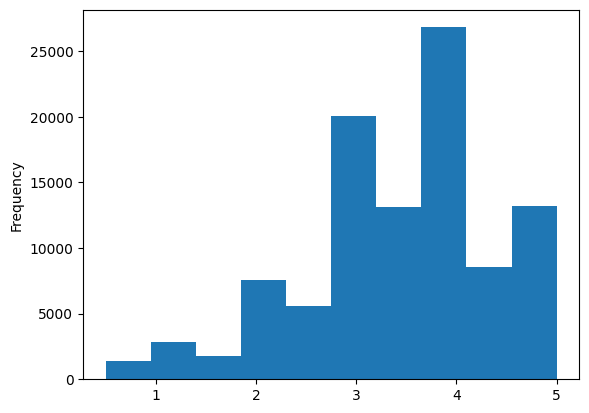

In [69]:
notasDS.Notas.plot(kind='hist') # Alem da versão com [] tambem podemos referenciar uma coluna de dados hamando ela como um atributo do objeto "notas"
# Este tipo de visualização não é o ideal, pois sua estrutura é pouco legivel, apartir daqui para fazer oque chamamos de "plotagem ou plot" de dados, vamos utilizar sempre preferencialmente a bibliotecas Seaborn que é a mais ideal para este trabalho.

<Axes: ylabel='Notas'>

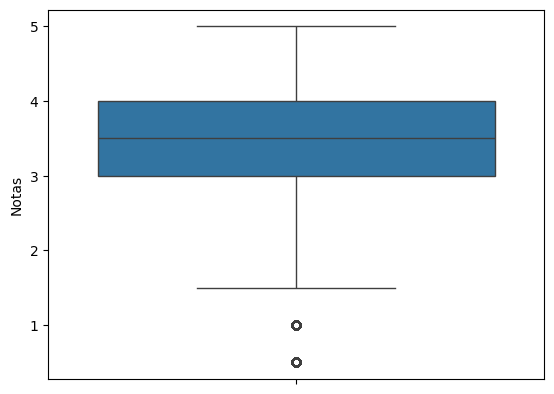

In [70]:
# Aqui esta um exemplo doque chamamos de "plot de caixa" ou boxplot com o Seaborn
sns.boxplot(notasDS.Notas)

## Analisando Filmes e Cruzando dados

In [71]:
filmesDB = pd.read_csv("./Base de Dados/ml-latest-small/movies.csv")
filmesDB.columns = ["IDFilme", "Titulo", "Generos"]
filmesDB.head()

,IDFilme,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [72]:
notasDS.query("IDFilme==1").Notas.describe() # Analize das Notas do Filme com o (ID 1)

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Notas, dtype: float64

In [73]:
notasDS.groupby("IDFilme").mean() 
# O GroupBY serve para agruparmos todos os registros com base em valores unicos presentes em um coluna especifica

# Neste caso aqui, estamos agrupando todos os registros com base no ID de cada "Filme", fazendo com que cada registro de filme se transforme em 1 unico registro

# Com o auxilio da função mean(), que calcula a media, como falado anteriormente, todos os registros dos dados de [IDUsuario], [Notas] e [Momento] daquele filme serão calculados combase no ID daquele "Filme"

# Apartir daqui ao inves dos dados possuirem um index padrão sendo o numero da linha, o index sera transformado no IDFilme pois é com base nele que todos os dados vão ser organizados

,IDUsuarios,Notas,Momento
IDFilme,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [86]:
medias_por_filme = notasDS.groupby("IDFilme").mean()["Notas"].reset_index()
# Neste trecho estamos extraindo apenas o valor da coluna [Notas] e o salvando dentro de um outro objeto dataset (medias_por_filme), pois não vai fazer sentido algum calcular a media di [IDUsuarios] e do [Momento], Porque são valores que não devem possuir qualquer operação
medias_por_filme.head() # Aqui vamos vizualizar

,IDFilme,Notas
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


<Axes: ylabel='Frequency'>

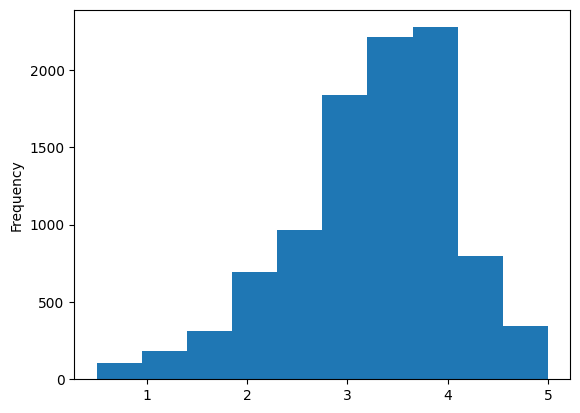

In [ ]:
medias_por_filme.Notas.plot(kind='hist') #Plotar um grafico com as Notas

C:\Users\georg\AppData\Local\Temp\ipykernel_10804\3708293127.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme.Notas, bins=10) # Esta forma de Grafico de Distribuição sera removida na proxima atualização a v0.14.0 do seborn, eu to estou usando aqui para ilustrar a representação de dados


,IDFilme,Notas
count,9724.000000,9724.000000
mean,42245.024373,3.262448
std,52191.137320,0.869874
min,1.000000,0.500000
25%,3245.500000,2.800000
50%,7300.000000,3.416667
75%,76739.250000,3.911765
max,193609.000000,5.000000


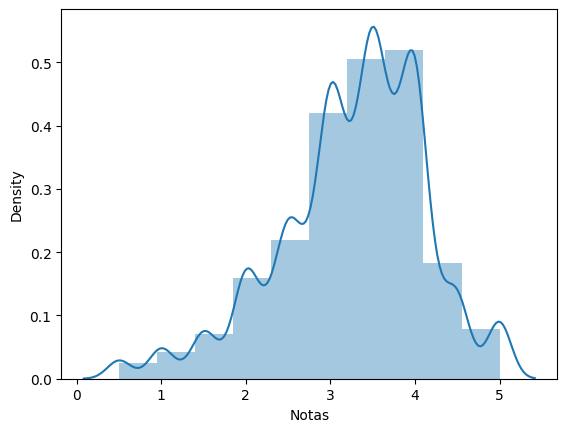

In [91]:
sns.distplot(medias_por_filme.Notas, bins=10) # Esta forma de Grafico de Distribuição sera removida na proxima atualização a v0.14.0 do seborn, eu to estou usando aqui para ilustrar a representação de dados

# Explicando o (bins=10), bins vai nos trazer um recorte definido das distribuiçoes dos dados escolhidos, o quanto menor for esse recorte menos preciso vai ser o grafico e com menos barras verticais ira aparecer em sua visualização, o quanto maior for, mais preciso vai o grafico se apresentará. O valor da quantidade de bins deverá ser escolhida de acordo com a necessidade da quantidade relevante da taxa de amostragem para os dados atraves de conceitos matematicos

#sns.histplot(medias_por_filme, kde=True, stat="density") # Esta aqui será a nova versão da função, pois ela aparece a disperção por densidade
medias_por_filme.describe()

## Juntando medias com Filmes

In [111]:

medias_concat = pd.merge( # Aqui será executado um Inner Join dos valores com a junção dos dataframes [filmesDB] e [medias_por_filme]
    left=filmesDB, # Aqui sera referenciado a tabela que contera os valores a "esquerda"
    right=medias_por_filme, # Aqui sera referenciado a tabela que contera os valores a "Direita"
    how="inner", # Aqui serão considerados somente os registros comuns aos dois conjuntos de dados, descartando por completo os resultados que sairão incompletos
    left_on="IDFilme",right_on="IDFilme") # Aqui vai ser referenciado a coluna com os dados que vão ser comparados  
medias_concat

,IDFilme,Titulo,Generos,Notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9721,193585,Flint (2017),Drama,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


# Exportação de Dados (L)

In [114]:
medias_concat.to_csv('medias-de-todos-os-filmes.csv', sep=',', encoding='utf-8')